__**Table of Contents**__
====

>#### [7/6/2019-7/8/2019](#7062019)
&emsp;   Locating highest density of stars on-sky 
>#### [7/12/2019-7/15/2019](#7122019)
&emsp;   Selecting centrally located fields + cross-matching
>#### [7/15/2019-7//2019](#7152019)
&emsp;   Combining data of cross-matched fields and color-color plots for separation (a la Data Lab Jupyter notebook)

<a id='7062019'></a>

>### I need a large set of stars from my data set to cross-match with the DESI Legacy survey.  Below I plot on-sky histograms with counts to ascertain the locations of highest density.  First, I use 300 exposures from throughout the entire survey:

In [26]:
# Import modules
import numpy as np
from scipy import stats
import basic
from astropy.table import Table
import warnings
import random

#Suppress iPython warnings
warnings.filterwarnings('ignore')

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Create blank array with necessary bins
ra = np.array([])
de = np.array([])
stars = np.column_stack((ra,de))

#Look at 300 exposures
for i in range(0,300):   ###LOADING ALL CCDS AT ONCE
    
    #Loading subscriptable catalog
    z = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(
        night['night'][i*200][1:3],night['night'][i*200][0:7],night['night'][i*200][0:14])) 
    
    ra = z['ra']
    de = z['de']
       
    st = np.column_stack((ra,de))
    stars = np.vstack((stars,st))

IndexError: index 43600 is out of bounds for axis 0 with size 43548

<IPython.core.display.Javascript object>


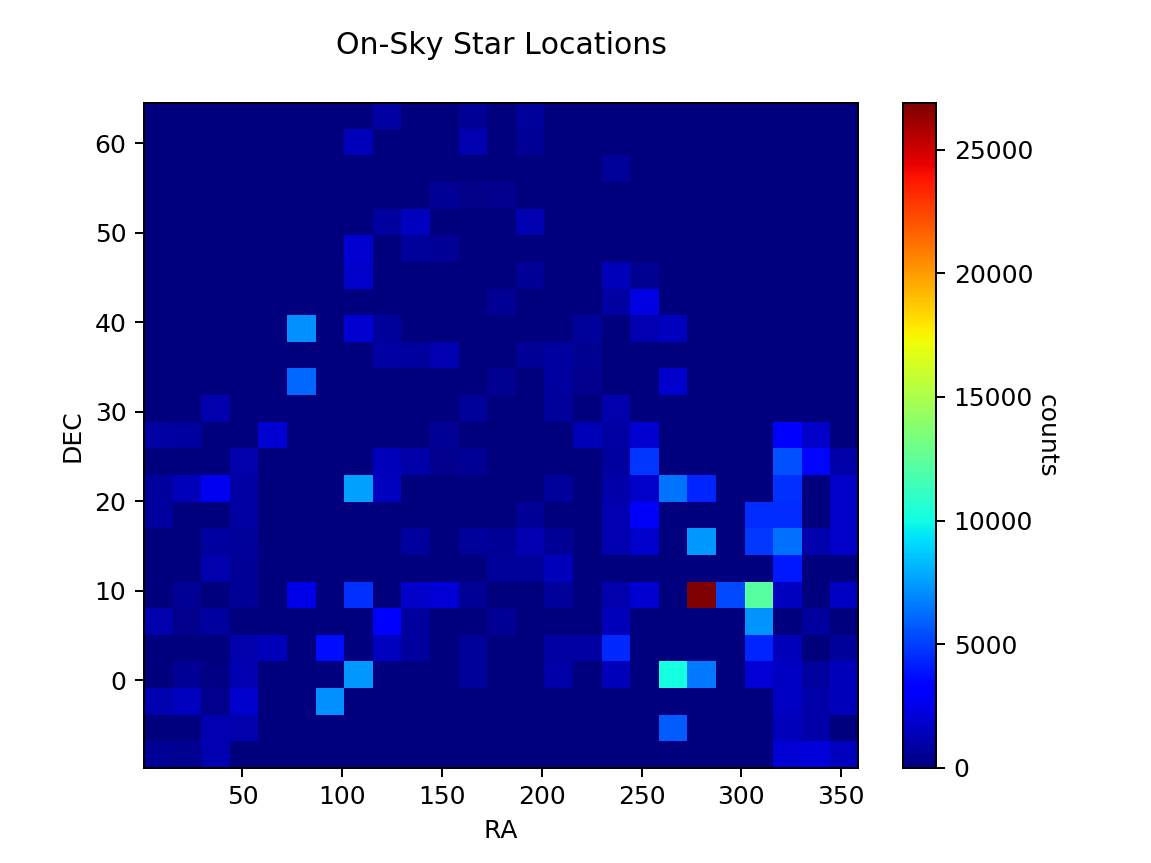

In [32]:
#Import modules
import matplotlib.pyplot as plt
%matplotlib nbagg

count,xedge,yedge,bin = stats.binned_statistic_2d(stars[:,0],stars[:,1],None,'count',bins=25)

#count[count==0]=1
ax = plt.imshow(count.T,extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('On-Sky Star Locations', y=1.05)
cbar = plt.colorbar()
cbar.set_label('counts', rotation=270, labelpad=10)

>### Now just counts from the first 300 exposures:

In [33]:
# Import modules
import numpy as np
from scipy import stats
import basic
from astropy.table import Table
import warnings
import random

#Suppress iPython warnings
warnings.filterwarnings('ignore')

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Create blank array with necessary bins
ra = np.array([])
de = np.array([])
stars = np.column_stack((ra,de))

#Look at 300 exposures
for i in range(0,300):   ###LOADING ALL CCDS AT ONCE
    
    #Loading subscriptable catalog
    z = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(
        night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14])) 
    
    ra = z['ra']
    de = z['de']
       
    st = np.column_stack((ra,de))
    stars = np.vstack((stars,st))

<IPython.core.display.Javascript object>


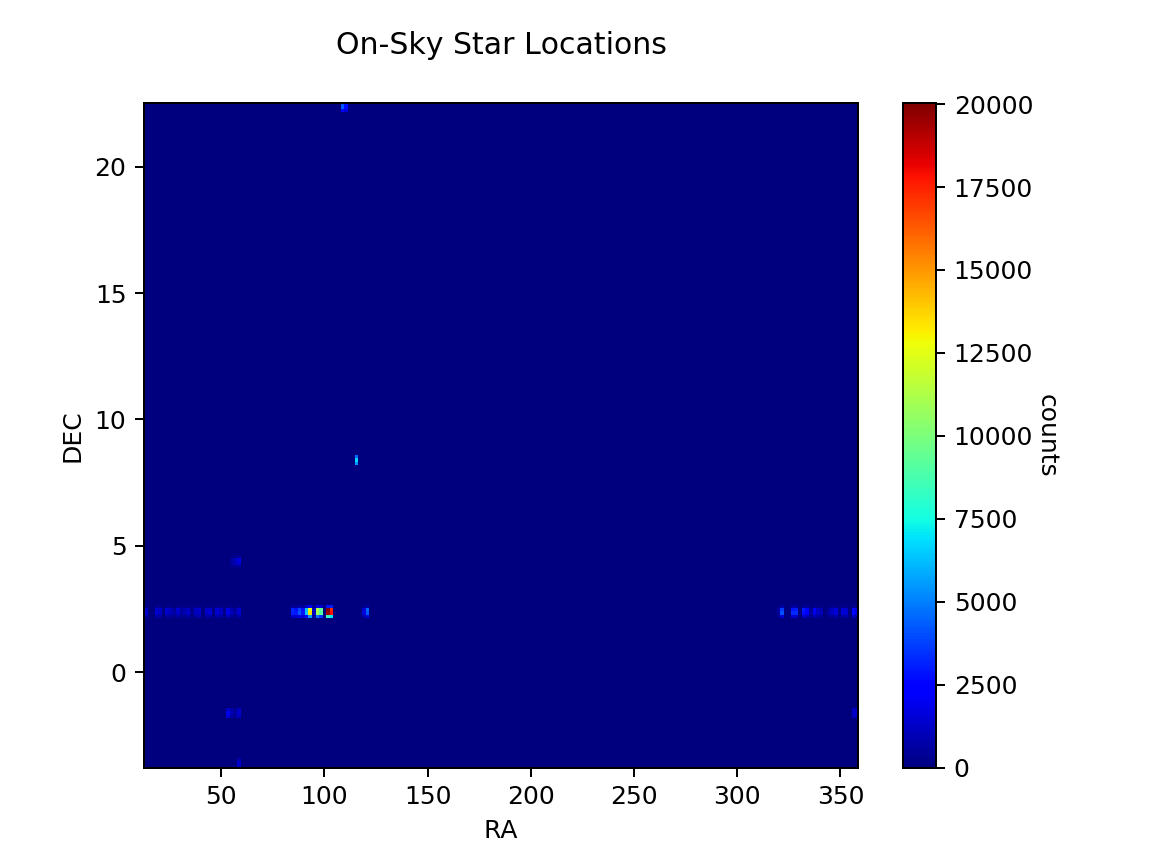

In [40]:
#Import modules
import matplotlib.pyplot as plt
%matplotlib nbagg

count,xedge,yedge,bin = stats.binned_statistic_2d(stars[:,0],stars[:,1],None,'count',bins=200)

#count[count==0]=1
ax = plt.imshow((count.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('On-Sky Star Locations', y=1.05)
cbar = plt.colorbar()
cbar.set_label('counts', rotation=270, labelpad=10)

<a id='7122019'></a>

>### As per David's advice, I have elected to simply choose some of the centrally located fields in the Munn survey.  The chosen fields are indicated in the scatter plot below.  These fields are located between:
> 
>### 170 < RA < 190
>### 25 < DEC < 35

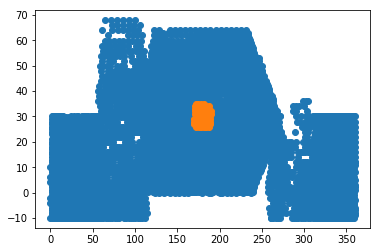

0.38% of total stars


In [105]:
#Import modules
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

#Load the fits table with data pertaining to fields
fields = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\fields.fits')

#Select the central fields
ind, = np.where((fields['ra']>170)&(fields['ra']<190)&(fields['dec']>25)&(fields['dec']<35))
fieldsr = fields[ind]

plt.scatter(fields['ra'],fields['dec'])
plt.scatter(fieldsr['ra'],fieldsr['dec'])

plt.show()

print("{0}% of total stars".format(round(sum(fieldsr['n_stars'])/sum(fields['n_stars']),4)*100))

>### I need to pick out the exposures of these fields from the Munn data.  I can also simultaneously cross-match the sources with those from the DESI legacy survey.

In [ ]:
# Import modules
import numpy as np
from astropy.table import Table,hstack
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import warnings
import basic

#Suppress iPython warnings
warnings.filterwarnings('ignore')

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Load DESI LS data
ls = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\ls_dr7_cfields.csv')

#Generate fits table with reddening-corrected photometry and total proper motion.
for i in range(43548):
    chip = int(night['ccdn'][i])
    r = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(
        night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    
    if np.any((r['ra']<190)&(r['ra']>170)&(r['de']>25)&(r['de']<35)):
    
        t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(
            night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)

        #Correct for extinction
        g_extinct = t.extinction_correct('g')
        i_extinct = t.extinction_correct('i')
        z_extinct = t.extinction_correct('z')
        d_extinct = t.extinction_correct('ddo51')

        #Proper motions in RA and DEC
        pmra = r['pmra']
        pmde = r['pmde']

        #Calculate total proper motion
        tpm = np.sqrt(pmra**2+pmde**2)

        #Numpy arrays with de-reddened photometry and total proper motions
        gp = np.array(g_extinct)
        ip = np.array(i_extinct)
        zp = np.array(z_extinct)
        dp = np.array(d_extinct)
        tpm = np.array(tpm)

        #fits table to house photometry and total proper motions
        col1 = fits.Column(name='dr_g', format='D05', array=np.zeros(len(r)))
        col2 = fits.Column(name='dr_i', format='D05', array=np.zeros(len(r)))
        col3 = fits.Column(name='dr_z', format='D05', array=np.zeros(len(r)))
        col4 = fits.Column(name='dr_ddo51', format='D05', array=np.zeros(len(r)))
        col5 = fits.Column(name='tpm', format='D05', array=np.zeros(len(r)))
        coldefs = fits.ColDefs([col1, col2,col3,col4,col5])
        dat = fits.BinTableHDU.from_columns(coldefs)
        dat = Table.read(dat)

        #Insert reddening corrected photometry and total proper motions
        dat['dr_g'] = gp
        dat['dr_i'] = ip
        dat['dr_z'] = zp
        dat['dr_ddo51'] = dp
        dat['tpm'] = tpm

        #Combining data into single fits table (no legacy survey yet)
        dd = hstack([r,dat])

        #Remove nans from new catalog
        ind, = np.where((~np.isnan(dd['dr_g']))&(~np.isnan(dd['dr_i']))&(~np.isnan(dd['dr_z']))&
                       (~np.isnan(dd['dr_ddo51']))&(~np.isnan(dd['tpm'])))
        dd = dd[ind]

        #Cross-matching with ls
        c_ls=SkyCoord(ra=ls['lsra']*u.degree,dec=ls['lsdec']*u.degree)
        c_dd=SkyCoord(ra=dd['ra'],dec=dd['de'])

        #d2d represents on-sky distances
        idx, d2d, d3d = c_ls.match_to_catalog_sky(c_dd) 
        good=(d2d.arcsec < 1)

        #Keep matching values in ls and indices
        lstemp = ls[good]
        idx = idx[good]

        #Keep matching values in dd
        dd = dd[idx]

        #Combining ALL data (including legacy survey)
        if np.any((len(lstemp)>0)&(len(dd)>0)): 
            tab = hstack([dd,lstemp])

            os.chdir(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch')
            tab.write("{0}_{1}.fits".format(night['night'][i][0:11],chip) , format='fits')
        
        else:
            pass
    else:
        pass

<a id='7152019'></a>

>### Below I combine all the new exposures with cross-matched legacy survey data into a single table.

In [46]:
#Import modules
import os, os.path
import numpy as np

#Make a list of the exposures in the directory
path, dirs, night = next(os.walk(
    r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch"))

night = night[:-1]

len(night)

32

In [17]:
#Import modules
from astropy.table import Table, vstack

tab = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\g13d006.019_4.fits')
tab = tab[0:0]

for i,v in enumerate(night):
    temp = Table.read(
        r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\{0}'.format(night[i]))
    tab = vstack([tab,temp])

In [19]:
len(tab)

5257

In [6]:
#Load modules
# std lib
from astropy.table import Table

# 3rd party
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from scipy.stats import binned_statistic_2d
%matplotlib inline

In [56]:
#Make variable the same as in Data Lab Jupyter notebook
#ls = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\ls_dr7_cfields.csv')
result = tab

>### CELLS BELOW ARE FROM DATA LAB JUPYTER NOTEBOOK

In [60]:
# Select range of interest
thres = 5.   #threshold value for S/N (here, making it more stringent than query)
keepIr = (result['snr_g']>thres)&(result['snr_r']>thres)&(result['snr_z']>thres)&(result['snr_w1']>thres)

# Constraint on S/N(W1) but not S/N(W2) [won't be used as much below]
g_r_ir   = result['gmag'][keepIr] - result['rmag'][keepIr]
z_w1_ir  = result['zmag'][keepIr] - result['w1mag'][keepIr]
w1_w2_ir = result['w1mag'][keepIr] - result['w2mag'][keepIr]

# Classification per object type
objtype_ir = result['type'][keepIr]

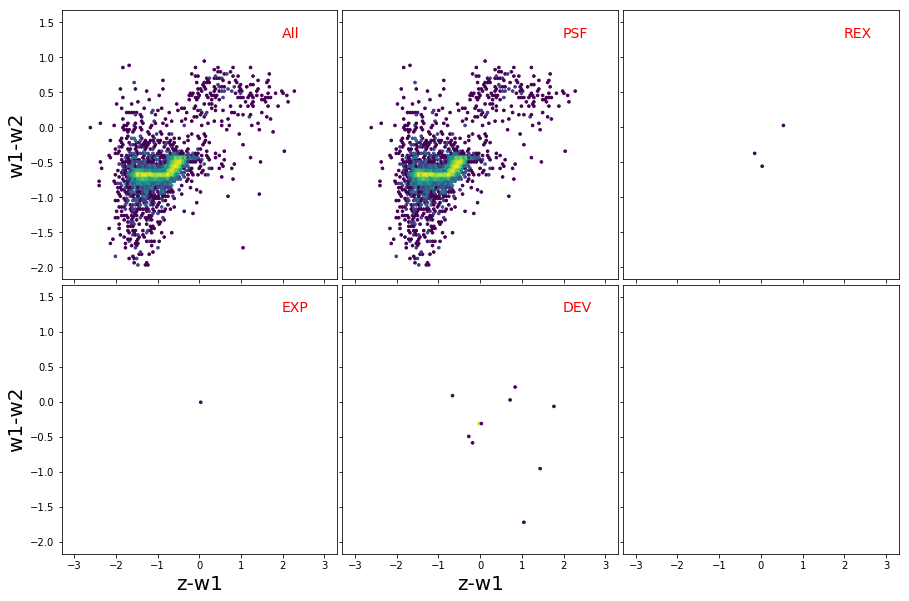

In [61]:
# First, try z-W1 versus infrared color W1-W2
col0 = z_w1_ir
col1 = w1_w2_ir

# List
typeList = ['All','PSF','REX','EXP','DEV']

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype_ir),dtype='bool')
    else:
        selec = (objtype_ir==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3, -2., 1.5))
    if i>=3: ax.set_xlabel('z-w1',fontsize=20)
    if i%3==0: ax.set_ylabel('w1-w2',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

In [32]:
len(col0)

5221

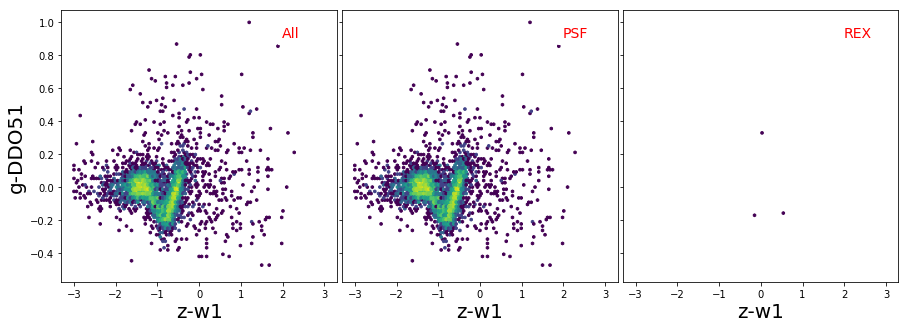

In [76]:
# First, try z-W1 versus infrared color W1-W2
col1 = result['gmag']-result['dr_ddo51']
col0  = result['zmag'] - result['w1mag']

# List
typeList = ['All','PSF','REX']

objtype_ir = result['type']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex='all', sharey='all')
axes = axes.flatten()

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype_ir),dtype='bool')
    else:
        selec = (objtype_ir==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3, -0.5, 1))
    if i>=0: ax.set_xlabel('z-w1',fontsize=20)
    if i%3==0: ax.set_ylabel('g-DDO51',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

>### It looks like I need a lot more sources to do any work separating background objects from stars in the MW.  I repeat the process as before but with a wider selection.

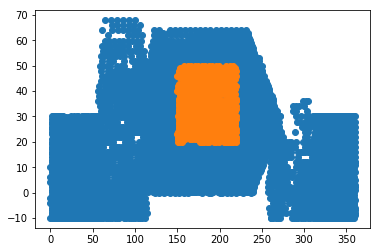

4.19% of total stars


In [104]:
#Import modules
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

#Load the fits table with data pertaining to fields
fields = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\fields.fits')

#Select the central fields
ind, = np.where((fields['ra']>150)&(fields['ra']<220)&(fields['dec']>20)&(fields['dec']<50))
fieldsr = fields[ind]

plt.scatter(fields['ra'],fields['dec'])
plt.scatter(fieldsr['ra'],fieldsr['dec'])

plt.show()

print("{0}% of total stars".format(round(sum(fieldsr['n_stars'])/sum(fields['n_stars']),4)*100))

In [18]:
# Import modules
import numpy as np
from astropy.table import Table,hstack
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import warnings
import basic

#Suppress iPython warnings
warnings.filterwarnings('ignore')

#Import list of exposures/CCDs
night = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\exposures.fits')

#Load DESI LS data
ls = Table.read(
    r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\ls_dr7_cfields_3.csv')

#Generate fits table with reddening-corrected photometry and total proper motion.
for i in range(43548):
    chip = int(night['ccdn'][i])
    r = Table.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(
        night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), path="{0}".format(chip))
    
    if np.any((r['ra']<220)&(r['ra']>150)&(r['de']>20)&(r['de']<50)):
    
        t = basic.Catalog.read(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}".format(
            night['night'][i][1:3],night['night'][i][0:7],night['night'][i][0:14]), chips=chip)

        #Correct for extinction
        g_extinct = t.extinction_correct('g')
        i_extinct = t.extinction_correct('i')
        z_extinct = t.extinction_correct('z')
        d_extinct = t.extinction_correct('ddo51')

        #Proper motions in RA and DEC
        pmra = r['pmra']
        pmde = r['pmde']

        #Calculate total proper motion
        tpm = np.sqrt(pmra**2+pmde**2)

        #Numpy arrays with de-reddened photometry and total proper motions
        gp = np.array(g_extinct)
        ip = np.array(i_extinct)
        zp = np.array(z_extinct)
        dp = np.array(d_extinct)
        tpm = np.array(tpm)

        #fits table to house photometry and total proper motions
        col1 = fits.Column(name='dr_g', format='D05', array=np.zeros(len(r)))
        col2 = fits.Column(name='dr_i', format='D05', array=np.zeros(len(r)))
        col3 = fits.Column(name='dr_z', format='D05', array=np.zeros(len(r)))
        col4 = fits.Column(name='dr_ddo51', format='D05', array=np.zeros(len(r)))
        col5 = fits.Column(name='tpm', format='D05', array=np.zeros(len(r)))
        coldefs = fits.ColDefs([col1, col2,col3,col4,col5])
        dat = fits.BinTableHDU.from_columns(coldefs)
        dat = Table.read(dat)

        #Insert reddening corrected photometry and total proper motions
        dat['dr_g'] = gp
        dat['dr_i'] = ip
        dat['dr_z'] = zp
        dat['dr_ddo51'] = dp
        dat['tpm'] = tpm

        #Combining data into single fits table (no legacy survey yet)
        dd = hstack([r,dat])

        #Remove nans from new catalog
        ind, = np.where((~np.isnan(dd['dr_g']))&(~np.isnan(dd['dr_i']))&(~np.isnan(dd['dr_z']))&
                       (~np.isnan(dd['dr_ddo51']))&(~np.isnan(dd['tpm'])))
        dd = dd[ind]

        #Cross-matching with ls
        c_ls=SkyCoord(ra=ls['lsra']*u.degree,dec=ls['lsdec']*u.degree)
        c_dd=SkyCoord(ra=dd['ra'],dec=dd['de'])

        #d2d represents on-sky distances
        idx, d2d, d3d = c_ls.match_to_catalog_sky(c_dd) 
        good=(d2d.arcsec < 1)

        #Keep matching values in ls and indices
        lstemp = ls[good]
        idx = idx[good]

        #Keep matching values in dd
        dd = dd[idx]

        #Combining ALL data (including legacy survey)
        if np.any((len(lstemp)>0)&(len(dd)>0)): 
            tab = hstack([dd,lstemp])

            os.chdir(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch')
            tab.write("{0}_{1}.fits".format(night['night'][i][0:11],chip) , format='fits')
        
        else:
            pass
    else:
        pass

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\DDO51\\Central fields LS xmatch\\ls_dr7_cfields_3.csv'

In [2]:
#Import modules
import os, os.path
import numpy as np

#Make a list of the exposures in the directory
path, dirs, night = next(os.walk(
    r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch"))

night = night[:-3]

len(night)
#night

126

In [37]:

#Import modules
import os, os.path
import numpy as np
​
#Make a list of the exposures in the directory
path, dirs, night = next(os.walk(
    r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch"))
​
night = night[:-3]
​
len(night)
#night
126
#Import modules
from astropy.table import Table, vstack

tab = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\g12d342.039_6.fits')
tab = tab[0:0]

for i,v in enumerate(night):
    temp = Table.read(
        r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\{0}'.format(night[i]))
    tab = vstack([tab,temp])
    
len(tab)

34131

In [23]:
#Load modules
# std lib
from astropy.table import Table

# 3rd party
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from scipy.stats import binned_statistic_2d
%matplotlib inline

In [24]:
#Make variable the same as in Data Lab Jupyter notebook
#ls = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch\ls_dr7_cfields.csv')
result = tab

>### CELLS BELOW ARE FROM DATA LAB JUPYTER NOTEBOOK

In [25]:
# Select range of interest
thres = 5.   #threshold value for S/N (here, making it more stringent than query)
keepIr = (result['snr_g']>thres)&(result['snr_r']>thres)&(result['snr_z']>thres)&(result['snr_w1']>thres)

# Constraint on S/N(W1) but not S/N(W2) [won't be used as much below]
g_r_ir   = result['gmag'][keepIr] - result['rmag'][keepIr]
z_w1_ir  = result['zmag'][keepIr] - result['w1mag'][keepIr]
w1_w2_ir = result['w1mag'][keepIr] - result['w2mag'][keepIr]

# Classification per object type
objtype_ir = result['type'][keepIr]

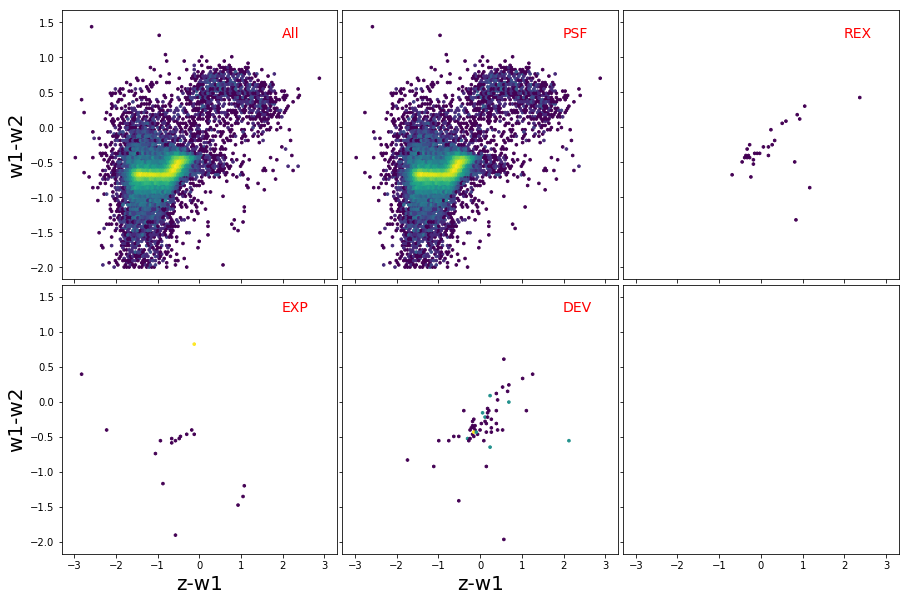

In [26]:
# First, try z-W1 versus infrared color W1-W2
col0 = z_w1_ir
col1 = w1_w2_ir

# List
typeList = ['All','PSF','REX','EXP','DEV']

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex='all', sharey='all')
axes = axes.flatten()

for i,typ in enumerate(typeList):
    ax = axes[i]
    if typ=='All':
        selec = np.ones(len(objtype_ir),dtype='bool')
    else:
        selec = (objtype_ir==typ)
    im = ax.hexbin(col0[selec], col1[selec], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3, 3, -2., 1.5))
    if i>=3: ax.set_xlabel('z-w1',fontsize=20)
    if i%3==0: ax.set_ylabel('w1-w2',fontsize=20)
    ax.text(0.8,0.9,typ,transform=ax.transAxes,fontsize=14,color='red',backgroundcolor='white')

plt.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

>### Next I will compare the background sources indicated in the g-DDO51 vs. g-i plot vs. the color-color space above

<IPython.core.display.Javascript object>


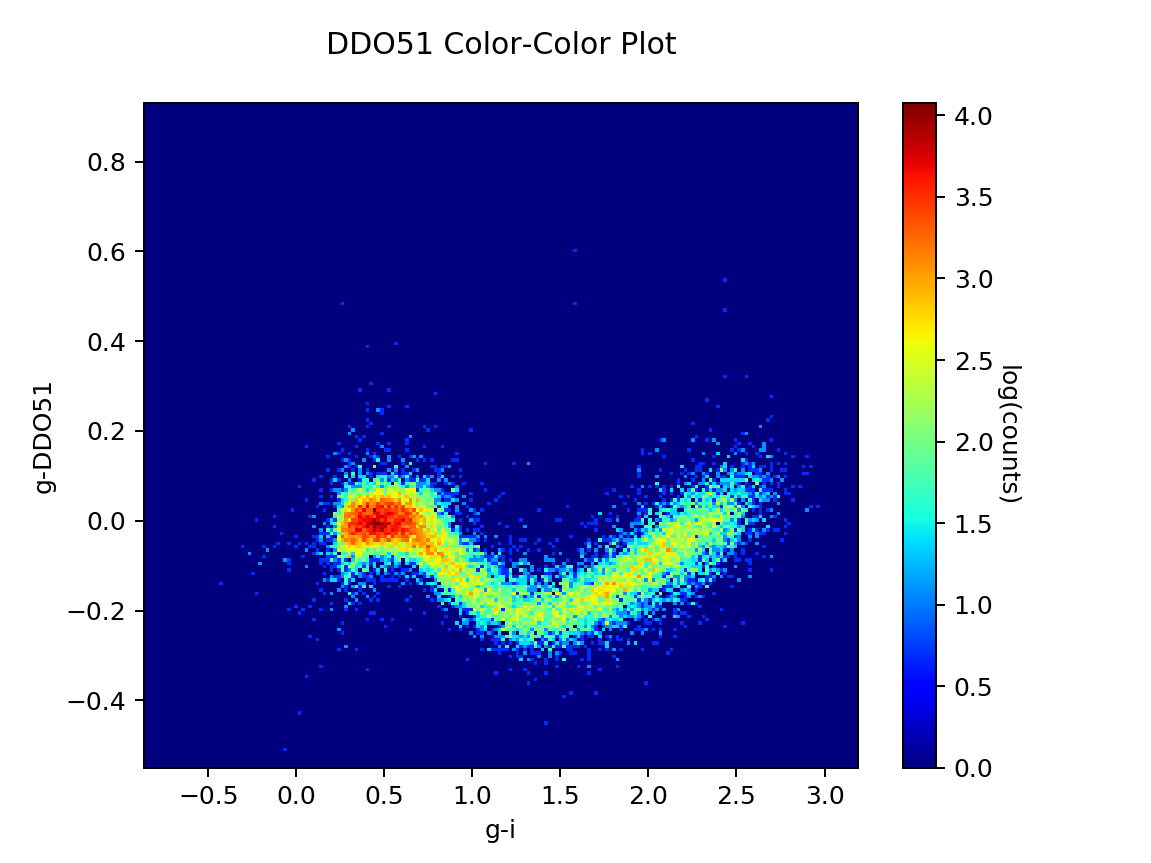

In [20]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

#Colors
x = tab['dr_g'] - tab['dr_i']
y = tab['dr_g'] - tab['dr_ddo51']

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')

#Counts
counts,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
plt.xlabel('g-i')
plt.ylabel('g-DDO51')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('DDO51 Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.show()

<IPython.core.display.Javascript object>


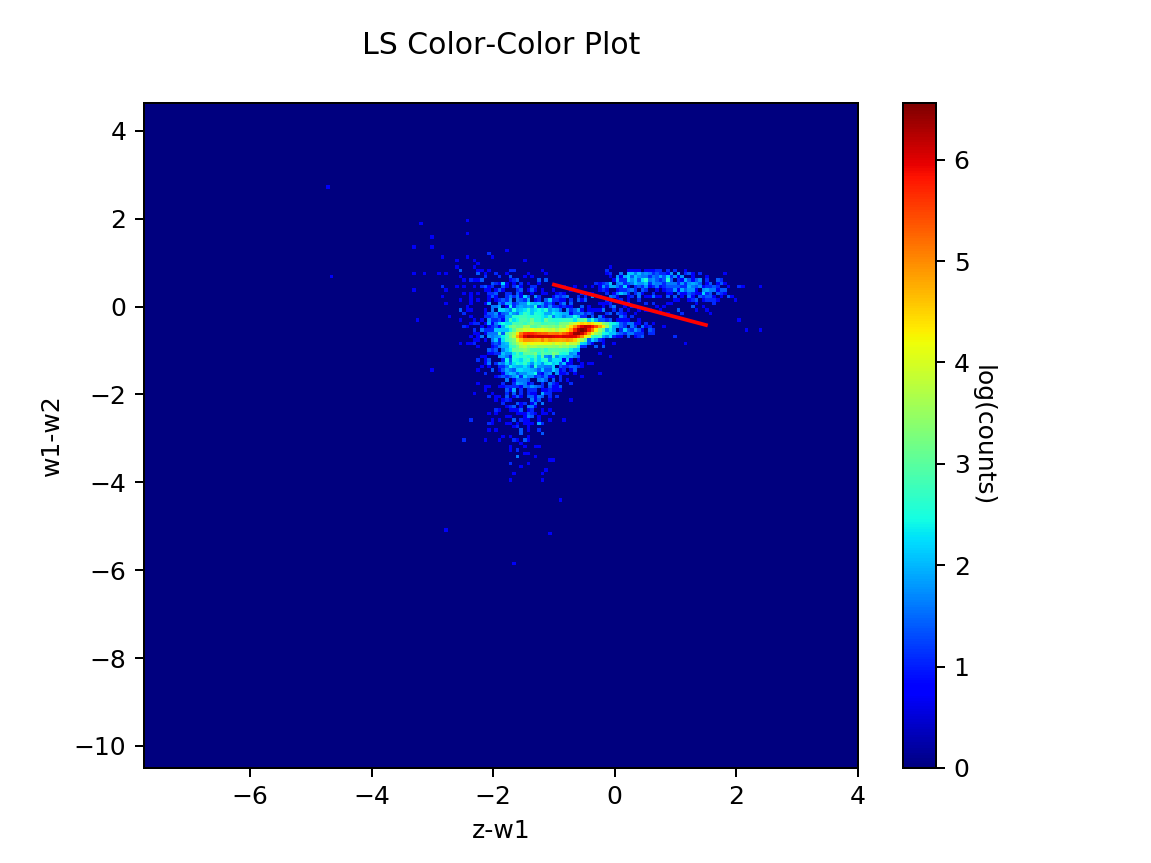

In [26]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

#Remove nans
ind, = np.where((~np.isnan(tab['zmag']))&(~np.isnan(tab['w1mag']))&(~np.isnan(tab['w2mag'])))
tab = tab[ind]

#Colors
x = tab['zmag'] - tab['w1mag']
y = tab['w1mag'] - tab['w2mag']

#Counts
counts,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=200)

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
plt.xlabel('z-w1')
plt.ylabel('w1-w2')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('LS Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.plot([-1,1.5],[0.5,-0.42],'k-',c='red')

plt.show()

In [27]:
ind, = np.where(y>((x+1)*(-0.368)+0.5))

<IPython.core.display.Javascript object>


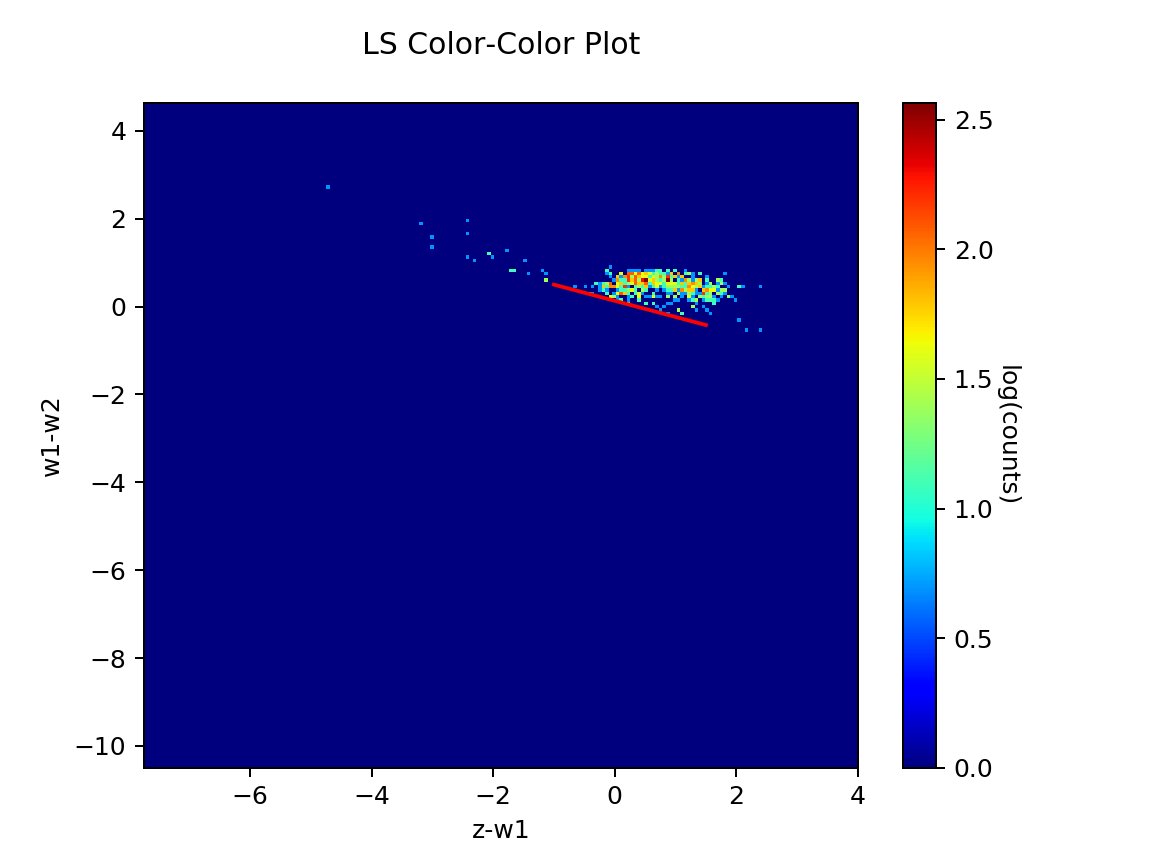

In [28]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

tabr = tab[ind]

#Remove nans
ind, = np.where((~np.isnan(tabr['zmag']))&(~np.isnan(tabr['w1mag']))&(~np.isnan(tabr['w2mag'])))
tabr = tabr[ind]

#Colors
x = tabr['zmag'] - tabr['w1mag']
y = tabr['w1mag'] - tabr['w2mag']

#Counts
counts,xed,yed,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
plt.xlabel('z-w1')
plt.ylabel('w1-w2')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('LS Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.plot([-1,1.5],[0.5,-0.42],'k-',c='red')

plt.show()

<IPython.core.display.Javascript object>


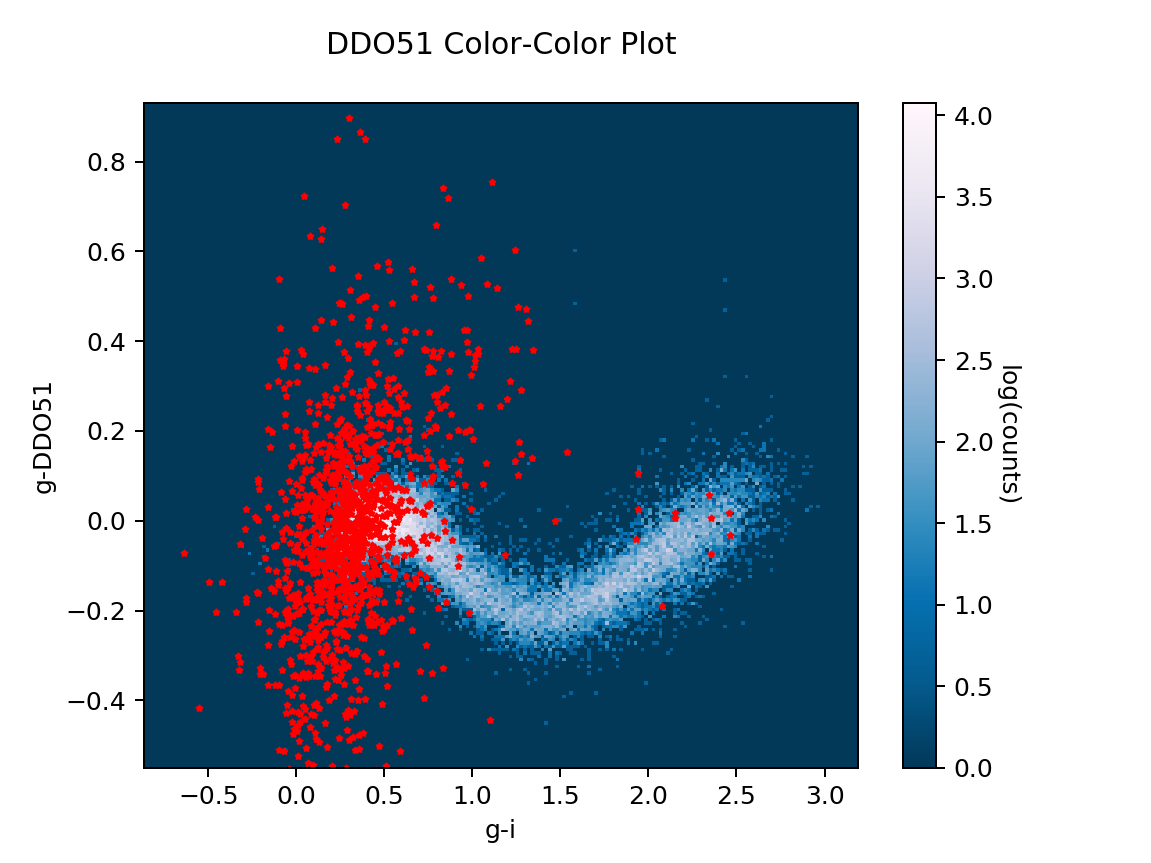

In [31]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

#Colors
x = tab['dr_g'] - tab['dr_i']
y = tab['dr_g'] - tab['dr_ddo51']

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')

#Counts
counts,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='PuBu_r', aspect="auto")
plt.xlabel('g-i')
plt.ylabel('g-DDO51')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('DDO51 Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

#Post-cut scatterplot
x = tabr['dr_g'] - tabr['dr_i']
y = tabr['dr_g'] - tabr['dr_ddo51']
plt.scatter(x,y,s=5,c='red',marker='*')
plt.xlim(xedge.min(),xedge.max())
plt.ylim(yedge.min(),yedge.max())

plt.show()

>### I now attempt to correlate background sources in reverse (DDO51 to LS).

<IPython.core.display.Javascript object>


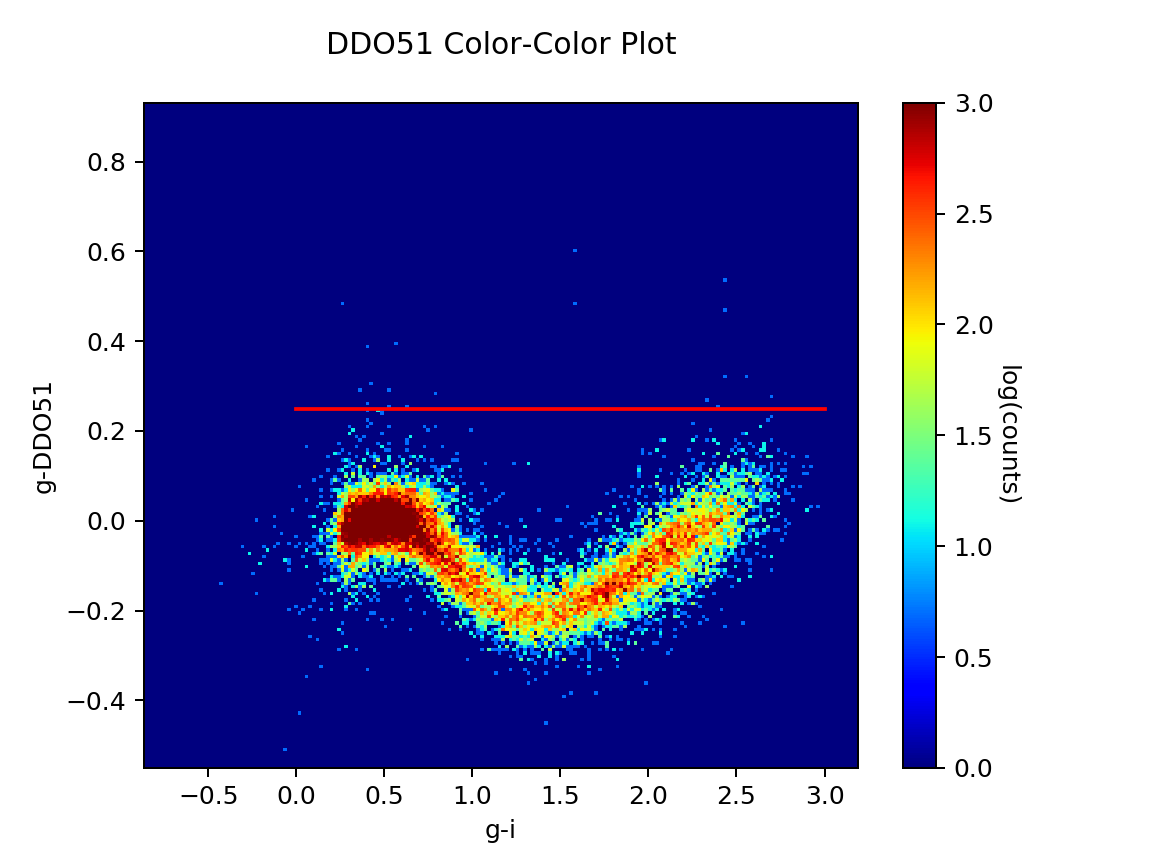

In [54]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

#Colors
x = tab['dr_g'] - tab['dr_i']
y = tab['dr_g'] - tab['dr_ddo51']

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')

#Counts
counts,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],
                origin='lower',cmap='jet', aspect="auto",vmax=3)
plt.xlabel('g-i')
plt.ylabel('g-DDO51')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('DDO51 Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.plot([0,3],[0.25,0.25],'k-',c='red')

plt.show()

In [55]:
ind, = np.where(y>0.25)
tabr = tab[ind]

In [56]:
len(tabr)

381

<IPython.core.display.Javascript object>


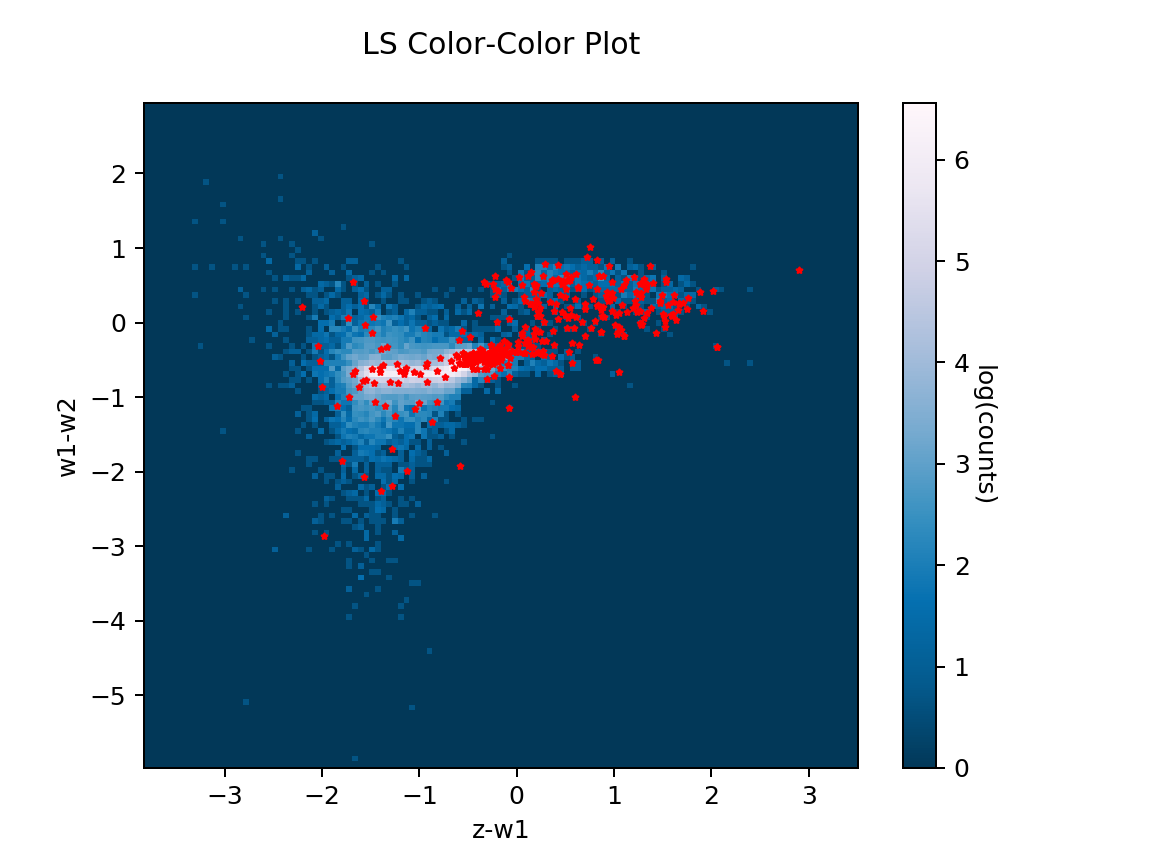

In [58]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

#Remove nans
ind, = np.where((~np.isnan(tab['zmag']))&(~np.isnan(tab['w1mag']))&(~np.isnan(tab['w2mag'])))
tab = tab[ind]

#Colors
x = tab['zmag'] - tab['w1mag']
y = tab['w1mag'] - tab['w2mag']

#Counts
counts,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=200)

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='PuBu_r', aspect="auto")
plt.xlabel('z-w1')
plt.ylabel('w1-w2')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('LS Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

#Post-cut scatterplot
x = tabr['zmag'] - tabr['w1mag']
y = tabr['w1mag'] - tabr['w2mag']
plt.scatter(x,y,s=5,c='red',marker='*')
plt.xlim(xedge.min(),xedge.max())
plt.ylim(yedge.min(),yedge.max())

plt.show()

>### Below I collect all the corresponding exposures to those that were cross-matched from the original Munn data.  I then plot these sources in g-DDO51 vs. g-i color-color space to see if the "cloud" of background sources is there or not.

In [3]:
#Import modules
import os, os.path
import numpy as np

#Make a list of the exposures in the directory
path, dirs, night = next(os.walk(
    r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\Central fields LS xmatch"))

night = night[:-3]

len(night)
#night

126

In [10]:
#Import modules
from astropy.table import Table, vstack
import warnings

#Suppress iPython warnings
warnings.filterwarnings('ignore')

tab = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2011\g11d302\pcat\g11d302.010.h5')
tab = tab[0:0]

for i,v in enumerate(night):
    temp = Table.read(
        r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}.h5".format(
            night[i][1:3],night[i][0:7],night[i][0:11]))
    tab = vstack([tab,temp])
    
len(tab)

73668

<IPython.core.display.Javascript object>


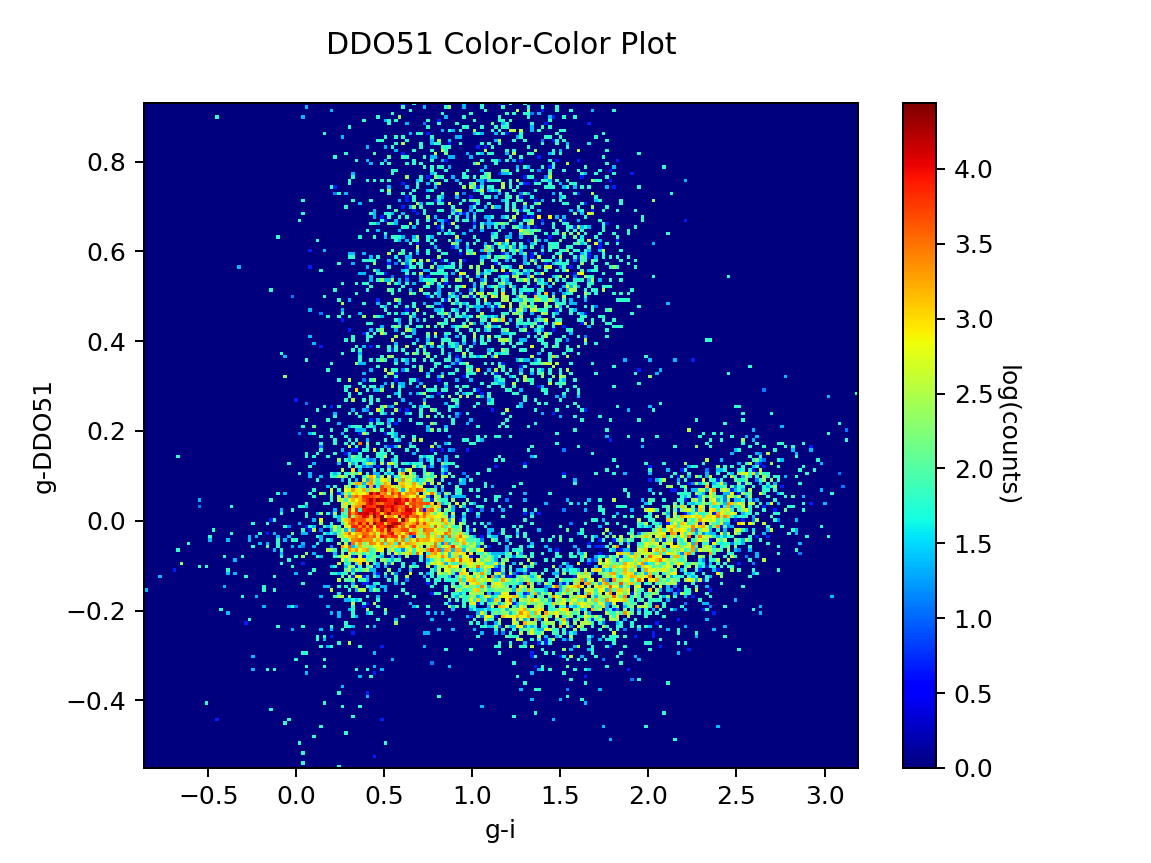

In [13]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

#Colors
x = tab['g'] - tab['i']
y = tab['g'] - tab['ddo51']

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')

#Counts
counts,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
plt.xlabel('g-i')
plt.ylabel('g-DDO51')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('DDO51 Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.show()

In [16]:
ind, = np.where(y>0.3)
tabr = tab[ind]

In [17]:
tabr

epoch,ra,e_ra,de,e_de,objID,objInfoFlag,qualityFlag,nStackDetections,nDetections,ng,g,e_g,gStd,gNpt,gMin,gMax,gKron,e_gKron,gQfPerfect,gFlags,nr,r,e_r,rStd,rNpt,rMin,rMax,rKron,e_rKron,rQfPerfect,rFlags,ni,i,e_i,iStd,iNpt,iMin,iMax,iKron,e_iKron,iQfPerfect,iFlags,nz,z,e_z,zStd,zNpt,zMin,zMax,zKron,e_zKron,zQfPerfect,zFlags,ny,y,e_y,yStd,yNpt,yMin,yMax,yKron,e_yKron,yQfPerfect,yFlags,nn_pan,m_gaia,d_gaia,source_id,ra_gaia,e_ra_gaia,de_gaia,e_de_gaia,parallax,e_parallax,pmra,e_pmra,pmde,e_pmde,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,phot_variable_flag,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,epoch_gaia,good_motion,m_twomass,d_twomass,pts_key,ra_twomass,de_twomass,j,e_j,j_ap,e_j_ap,h,e_h,h_ap,e_h_ap,k,e_k,k_ap,e_k_ap,ph_qual,rd_flg,bl_flg,cc_flg,gal_contam,use_src,ext_key,epoch_twomass,red_sfd,red_bayes,ra_epoch,de_epoch,x_pan,y_pan,m_ddo51,d_ddo51,NUMBER,ra_ddo51,de_ddo51,EXT_NUMBER,FLAGS,XWIN_IMAGE,ERRX2WIN_IMAGE,YWIN_IMAGE,ERRY2WIN_IMAGE,AWIN_IMAGE,ERRAWIN_IMAGE,BWIN_IMAGE,ERRBWIN_IMAGE,THETAWIN_IMAGE,ERRTHETAWIN_IMAGE,A_IMAGE,ERRA_IMAGE,B_IMAGE,ERRB_IMAGE,THETA_IMAGE,ERRTHETA_IMAGE,MAG_AUTO,MAGERR_AUTO,MAG_PETRO,MAGERR_PETRO,MAG_APER [4],MAGERR_APER [4],BACKGROUND,MU_THRESHOLD,FWHM_IMAGE,FLUX_RADIUS,KRON_RADIUS,PETRO_RADIUS,CLASS_STAR,x_dao,y_dao,psfMag,psfMagErr,sky,nIter,chi,sharp,skyMode,skyRms,skySkew,apMag [5],apMagErr [5],psfStar,ddo51,e_ddo51,nn_ddo51,survey,FLUX_AUTO,FLUXERR_AUTO
yr,deg,mas,deg,mas,,,,,,,mag,mag,mag,,mag,mag,mag,mag,,,,mag,mag,mag,,mag,mag,mag,mag,,,,mag,mag,mag,,mag,mag,mag,mag,,,,mag,mag,mag,,mag,mag,mag,mag,,,,mag,mag,mag,,mag,mag,mag,mag,,,arcsec,,arcsec,,deg,mas,deg,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,mas,,,1 / mas2,1 / micron,1 / micron,,,,mas,,,,electron / s,electron / s,mag,,electron / s,electron / s,mag,,electron / s,electron / s,mag,,,,,K,K,K,mag,mag,mag,mag,mag,mag,solRad,solRad,solRad,solLum,solLum,solLum,yr,,,arcsec,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,yr,mag,mag,deg,deg,pix,pix,,arcsec,,deg,deg,,,pix,pix2,pix,pix2,pix,pix,pix,pix,deg,deg,pix,pix,pix,pix,deg,deg,mag,mag,mag,mag,mag,mag,ct,mag / arcsec2,pix,pix,pix,pix,,pix,pix,mag,mag,ct,,,,ct,ct,,mag,mag,,mag,mag,arcsec,,ct,ct
float64,float64,float32,float64,float32,int64,int32,int16,int16,int16,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,int32,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,int32,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,int32,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,int32,int16,float32,float32,float32,int16,float32,float32,float32,float32,float32,int32,float32,int16,float32,int64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,float32,float32,float32,float32,int16,int16,float32,int16,bool,int16,float32,float32,float32,int16,float32,float32,float32,int16,float32,float32,float32,float32,int16,int16,int32,float32,float32,float32,float32,float32,float32,float32,float32,flo

<IPython.core.display.Javascript object>


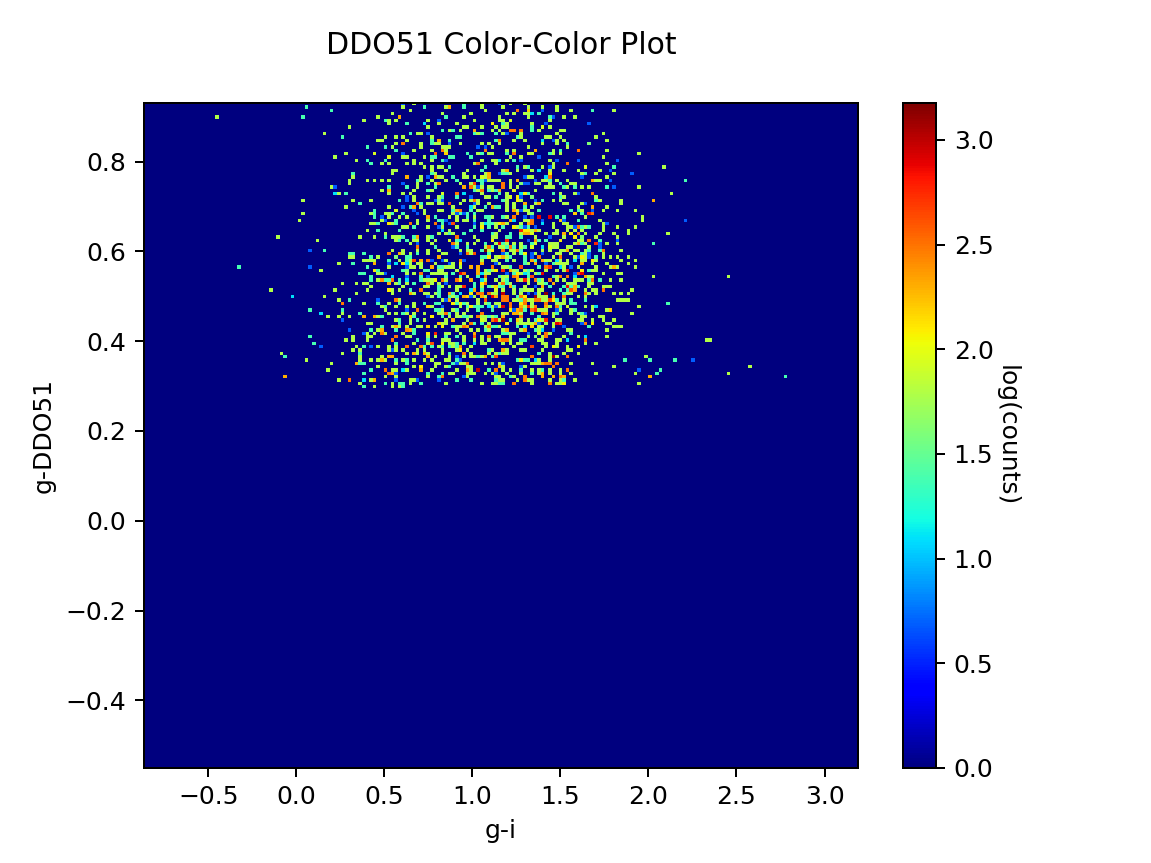

In [18]:
#Import modules
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib nbagg

#Colors
x = tabr['g'] - tabr['i']
y = tabr['g'] - tabr['ddo51']

#Load bin edges
xedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_xedge.npy')
yedge = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\cut_diagnostics\gi_gd_yedge.npy')

#Counts
counts,xedge,yedge,bin = stats.binned_statistic_2d(x,y,None,'count',bins=[xedge,yedge])

counts[counts==0]=1
ax = plt.imshow(np.log(counts.T),extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],origin='lower',cmap='jet', aspect="auto")
plt.xlabel('g-i')
plt.ylabel('g-DDO51')
#plt.ylim(-0.6,0.9)
#plt.xlim(-1,3.3)
plt.title('DDO51 Color-Color Plot', y=1.05)
cbar = plt.colorbar()
cbar.set_label('log(counts)', rotation=270, labelpad=10)

plt.show()